In [191]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from analyser import *

from scipy.stats.mstats import kendalltau, spearmanr
import random


In [192]:

from itertools import combinations

# Dummy dataset

In [212]:
usrcnt = 10
pblcnt = 10

order = range(pblcnt)

users = ["U%d"%i for i in range(usrcnt)]
pbls =  ["P%d"%i for i in range(pblcnt)]

In [213]:
df = pd.DataFrame(index=pbls)

for u in users:
    random.shuffle(order)
    df[u] = order

In [214]:
df

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9
P0,0,1,2,6,0,4,7,6,1,1
P1,8,3,4,0,3,7,1,3,5,4
P2,2,4,6,4,8,1,2,7,0,3
P3,5,2,1,1,6,6,6,0,6,8
P4,7,8,3,3,2,2,3,8,8,0
P5,4,7,9,2,5,9,4,1,7,7
P6,9,5,0,5,4,0,5,5,3,2
P7,3,6,7,9,1,5,8,2,2,6
P8,6,0,8,7,7,8,9,9,4,9
P9,1,9,5,8,9,3,0,4,9,5


# Possible users combinaisons

In [215]:
comb = [c for c in combinations(users, r=2)]
#print comb

# Compute Kendall rank for each combinaison

In [216]:
KR = [kendalltau(df[u1], df[u2]) for u1, u2 in comb]

### Kendall rank correlation

In [217]:
#  Kendall rank correlation
KRC = [a for a, b in [kendalltau(df[u1], df[u2]) for u1, u2 in comb]]

In [218]:
res = pd.DataFrame(index=comb)
res["KRC"] = KRC
res

,KRC
"(U0, U1)",-0.022222
"(U0, U2)",-0.111111
"(U0, U3)",-0.333333
"(U0, U4)",-0.066667
"(U0, U5)",0.022222
"(U0, U6)",0.022222
"(U0, U7)",-0.022222
"(U0, U8)",0.111111
"(U0, U9)",0.111111
"(U1, U2)",0.111111


### Kendall rank distance

In [219]:
l = [i for i in combinations(pbls, 2)]

comp = [df.T[a] > df.T[b] for a,b in l]
test = pd.DataFrame(comp)
dist = test.join(pd.Series(l, name="Pairs"))
dist

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9,Pairs
0,False,False,False,True,False,False,True,True,False,False,"(P0, P1)"
1,False,False,False,True,False,True,True,False,True,False,"(P0, P2)"
2,False,False,True,True,False,False,True,True,False,False,"(P0, P3)"
3,False,False,False,True,False,True,True,False,False,True,"(P0, P4)"
4,False,False,False,True,False,False,True,True,False,False,"(P0, P5)"
5,False,False,True,True,False,True,True,True,False,False,"(P0, P6)"
6,False,False,False,False,False,False,False,True,False,False,"(P0, P7)"
7,False,True,False,False,False,False,False,False,False,False,"(P0, P8)"
8,False,False,False,False,False,True,True,True,False,False,"(P0, P9)"
9,True,False,False,False,False,True,False,False,True,True,"(P1, P2)"


In [220]:
KRD = []
for u1, u2 in comb:
    s = dist[u1] != dist[u2]
    a = s.sum()
    n = len(pbls)
    KRD.append(float(a) / (n*(n-1) / 2))

In [221]:
res["KRD"] = KRD
res

,KRC,KRD
"(U0, U1)",-0.022222,0.511111
"(U0, U2)",-0.111111,0.555556
"(U0, U3)",-0.333333,0.666667
"(U0, U4)",-0.066667,0.533333
"(U0, U5)",0.022222,0.488889
"(U0, U6)",0.022222,0.488889
"(U0, U7)",-0.022222,0.511111
"(U0, U8)",0.111111,0.444444
"(U0, U9)",0.111111,0.444444
"(U1, U2)",0.111111,0.444444


### Spearman rank-order correlation

In [222]:
[a for a in spearmanr(df["U1"], df["U2"])]

[0.1393939393939394, masked_array(data = 0.70093188491,
              mask = False,
        fill_value = 1e+20)]

In [223]:
SROC = [a for a, b in [spearmanr(df[u1], df[u2]) for u1, u2 in comb]]

In [224]:
res["SROC"] = SROC
res

,KRC,KRD,SROC
"(U0, U1)",-0.022222,0.511111,-0.054545
"(U0, U2)",-0.111111,0.555556,-0.272727
"(U0, U3)",-0.333333,0.666667,-0.466667
"(U0, U4)",-0.066667,0.533333,-0.103030
"(U0, U5)",0.022222,0.488889,0.018182
"(U0, U6)",0.022222,0.488889,-0.006061
"(U0, U7)",-0.022222,0.511111,0.054545
"(U0, U8)",0.111111,0.444444,0.212121
"(U0, U9)",0.111111,0.444444,-0.018182
"(U1, U2)",0.111111,0.444444,0.139394


In [225]:
df

,U0,U1,U2,U3,U4,U5,U6,U7,U8,U9
P0,0,1,2,6,0,4,7,6,1,1
P1,8,3,4,0,3,7,1,3,5,4
P2,2,4,6,4,8,1,2,7,0,3
P3,5,2,1,1,6,6,6,0,6,8
P4,7,8,3,3,2,2,3,8,8,0
P5,4,7,9,2,5,9,4,1,7,7
P6,9,5,0,5,4,0,5,5,3,2
P7,3,6,7,9,1,5,8,2,2,6
P8,6,0,8,7,7,8,9,9,4,9
P9,1,9,5,8,9,3,0,4,9,5


In [226]:
normalize(res.KRC)
normalize(res.KRD)
normalize(res.SROC)

In [227]:
res

,KRC,KRD,SROC
"(U0, U1)",-0.014438,0.152815,-0.026702
"(U0, U2)",-0.072191,0.166103,-0.133510
"(U0, U3)",-0.216574,0.199323,-0.228450
"(U0, U4)",-0.043315,0.159459,-0.050437
"(U0, U5)",0.014438,0.146171,0.008901
"(U0, U6)",0.014438,0.146171,-0.002967
"(U0, U7)",-0.014438,0.152815,0.026702
"(U0, U8)",0.072191,0.132882,0.103841
"(U0, U9)",0.072191,0.132882,-0.008901
"(U1, U2)",0.072191,0.132882,0.068238


<IPython.core.display.Javascript object>


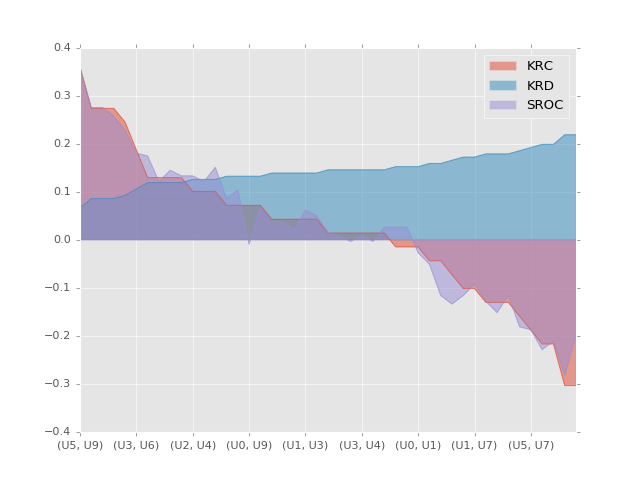

In [239]:
res.sort_values(by="KRD").plot(kind="area", stacked=False)

<IPython.core.display.Javascript object>


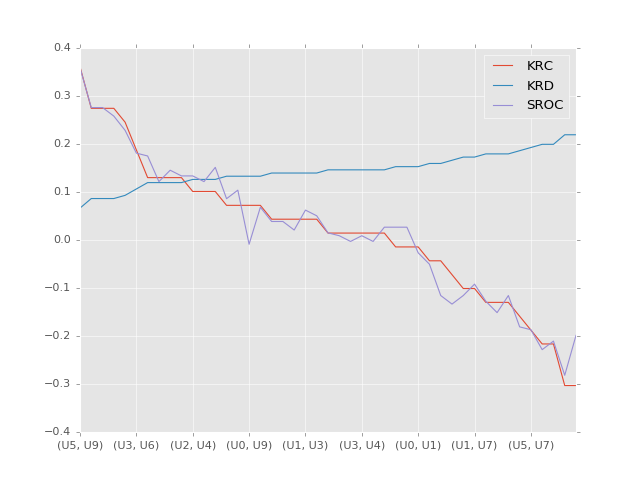

In [229]:
res.sort_values(by="KRD").plot()

In [211]:
df

,U0,U1,U2,U3,U4
P0,0,0,1,0,2
P1,1,2,0,1,0
P2,2,1,2,2,1
